In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/players_all.csv')
# pd.set_option('display.max_columns', 75)
# pd.set_option('display.max_rows', 100)

In [7]:
df.describe()

,Age,ID,Best overall,Growth,Total attacking,Total skill,Total movement,Total power,Total mentality,Total defending,Total goalkeeping,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
count,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,0.0
mean,24.278235,239270.844118,71.899020,6.046471,279.499804,293.117451,340.321765,318.807255,281.856471,151.688824,73.365686,1738.657255,382.789216,1.332549,71.454510,59.024510,63.407843,68.786078,53.299216,NaN
std,4.971900,37875.969756,7.043543,5.910425,72.566722,75.853158,53.189303,52.293542,64.273014,64.228334,79.811271,267.504801,41.610066,0.696276,10.482669,14.152435,10.133234,9.221444,17.864822,NaN
min,16.000000,80.000000,45.000000,0.000000,48.000000,58.000000,130.000000,137.000000,65.000000,25.000000,10.000000,788.000000,240.000000,1.000000,26.000000,22.000000,27.000000,31.000000,17.000000,NaN
25%,20.000000,224527.500000,67.000000,0.000000,253.000000,260.000000,314.000000,287.000000,253.000000,92.000000,47.000000,1594.000000,354.000000,1.000000,66.000000,50.000000,56.000000,63.000000,37.000000,NaN
50%,23.000000,245258.500000,72.000000,5.000000,292.000000,306.000000,349.000000,325.000000,291.000000,170.000000,52.000000,1777.000000,385.000000,1.000000,72.000000,61.000000,64.000000,70.000000,57.000000,NaN
75%,27.000000,266429.250000,77.000000,10.000000,327.000000,343.000000,377.000000,358.000000,324.000000,207.000000,57.000000,1928.000000,413.000000,1.000000,79.000000,70.000000,71.000000,75.000000,69.000000,NaN
max,47.000000,279917.000000,93.000000,26.000000,440.000000,465.000000,462.000000,442.000000,417.000000,269.000000,437.000000,2330.000000,500.000000,5.000000,97.000000,93.000000,94.000000,94.000000,89.000000,NaN


In [8]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,M. Olise RM RW CAM,21,80,88,Crystal Palace\n2021 ~ 2027,247827,"184cm / 6'0""",73kg / 161lbs,Left,82,...,10,2020,426,1,80,75,80,84,51,NaN
1,João Neves CM,18,77+1,88+1,Benfica\n2022 ~ 2028,272834,"174cm / 5'9""",66kg / 146lbs,Right,81,...,13,2065,438,1,76,59,74,78,75,NaN
2,A. Wharton CDM CM,19,74+1,85,Crystal Palace\n2024 ~ 2029,259240,"182cm / 6'0""",70kg / 154lbs,Left,76,...,12,1964,417,1,67,61,75,76,68,NaN
3,V. Gyökeres ST,25,82+1,87+1,Sporting CP\n2023 ~ 2028,241651,"187cm / 6'2""",90kg / 198lbs,Right,84,...,8,2036,438,1,87,81,67,79,35,NaN
4,Vitor Roque ST RW LW,18,76,88,FC Barcelona\n2024 ~ 2031,276589,"172cm / 5'8""",78kg / 172lbs,Right,78,...,9,1829,387,1,85,79,59,80,20,NaN


### data cleaning

In [9]:
df['Weight'] = df['Weight'].str.split(' ').str[0]
pattern = re.compile(r'\D+')
df['Weight'] = [int(pattern.sub('', weight)) for weight in df['Weight']]


In [10]:
df['Height'] = df['Height'].str.split(' ').str[0]
df['Height'] = [int(pattern.sub('', height)) for height in df['Height']]

In [11]:
# normalize the market value 
new_values = []
for value in df["Value"].str[1:]:
    if 'M' in value:
        new_values.append(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        new_values.append(float(value.replace('K', '')) * 1000)
    else:
        new_values.append(float(value))

df['new_values'] = new_values
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64,new_values
0,M. Olise RM RW CAM,21,80,88,Crystal Palace\n2021 ~ 2027,247827,184,73,Left,82,...,2020,426,1,80,75,80,84,51,NaN,47500000.0
1,João Neves CM,18,77+1,88+1,Benfica\n2022 ~ 2028,272834,174,66,Right,81,...,2065,438,1,76,59,74,78,75,NaN,22000000.0
2,A. Wharton CDM CM,19,74+1,85,Crystal Palace\n2024 ~ 2029,259240,182,70,Left,76,...,1964,417,1,67,61,75,76,68,NaN,8500000.0
3,V. Gyökeres ST,25,82+1,87+1,Sporting CP\n2023 ~ 2028,241651,187,90,Right,84,...,2036,438,1,87,81,67,79,35,NaN,45000000.0
4,Vitor Roque ST RW LW,18,76,88,FC Barcelona\n2024 ~ 2031,276589,172,78,Right,78,...,1829,387,1,85,79,59,80,20,NaN,17500000.0


In [12]:
for index, row in df.iterrows():
    team_contract = row["Team & Contract"]
    team = team_contract.split("\n")[0]
    df.at[index, "Team"] = team
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64,new_values,Team
0,M. Olise RM RW CAM,21,80,88,Crystal Palace\n2021 ~ 2027,247827,184,73,Left,82,...,426,1,80,75,80,84,51,NaN,47500000.0,Crystal Palace
1,João Neves CM,18,77+1,88+1,Benfica\n2022 ~ 2028,272834,174,66,Right,81,...,438,1,76,59,74,78,75,NaN,22000000.0,Benfica
2,A. Wharton CDM CM,19,74+1,85,Crystal Palace\n2024 ~ 2029,259240,182,70,Left,76,...,417,1,67,61,75,76,68,NaN,8500000.0,Crystal Palace
3,V. Gyökeres ST,25,82+1,87+1,Sporting CP\n2023 ~ 2028,241651,187,90,Right,84,...,438,1,87,81,67,79,35,NaN,45000000.0,Sporting CP
4,Vitor Roque ST RW LW,18,76,88,FC Barcelona\n2024 ~ 2031,276589,172,78,Right,78,...,387,1,85,79,59,80,20,NaN,17500000.0,FC Barcelona


In [13]:
# normalize the Wage value 
new_wages = []
for value in df["Wage"].str[1:]:
    if 'M' in value:
        new_wages.append(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        new_wages.append(float(value.replace('K', '')) * 1000)
    else:
        new_wages.append(float(value))

df['new_wages'] = new_wages
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64,new_values,Team,new_wages
0,M. Olise RM RW CAM,21,80,88,Crystal Palace\n2021 ~ 2027,247827,184,73,Left,82,...,1,80,75,80,84,51,NaN,47500000.0,Crystal Palace,37000.0
1,João Neves CM,18,77+1,88+1,Benfica\n2022 ~ 2028,272834,174,66,Right,81,...,1,76,59,74,78,75,NaN,22000000.0,Benfica,5000.0
2,A. Wharton CDM CM,19,74+1,85,Crystal Palace\n2024 ~ 2029,259240,182,70,Left,76,...,1,67,61,75,76,68,NaN,8500000.0,Crystal Palace,16000.0
3,V. Gyökeres ST,25,82+1,87+1,Sporting CP\n2023 ~ 2028,241651,187,90,Right,84,...,1,87,81,67,79,35,NaN,45000000.0,Sporting CP,22000.0
4,Vitor Roque ST RW LW,18,76,88,FC Barcelona\n2024 ~ 2031,276589,172,78,Right,78,...,1,85,79,59,80,20,NaN,17500000.0,FC Barcelona,44000.0


In [14]:
# normalize the Release clause value 
new_release_clause = []
for value in df["Release clause"].str[1:]:
    if 'M' in value:
        new_release_clause.append(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        new_release_clause.append(float(value.replace('K', '')) * 1000)
    else:
        new_release_clause.append(float(value))

df['new_release_clause'] = new_release_clause
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64,new_values,Team,new_wages,new_release_clause
0,M. Olise RM RW CAM,21,80,88,Crystal Palace\n2021 ~ 2027,247827,184,73,Left,82,...,80,75,80,84,51,NaN,47500000.0,Crystal Palace,37000.0,99800000.0
1,João Neves CM,18,77+1,88+1,Benfica\n2022 ~ 2028,272834,174,66,Right,81,...,76,59,74,78,75,NaN,22000000.0,Benfica,5000.0,48400000.0
2,A. Wharton CDM CM,19,74+1,85,Crystal Palace\n2024 ~ 2029,259240,182,70,Left,76,...,67,61,75,76,68,NaN,8500000.0,Crystal Palace,16000.0,17900000.0
3,V. Gyökeres ST,25,82+1,87+1,Sporting CP\n2023 ~ 2028,241651,187,90,Right,84,...,87,81,67,79,35,NaN,45000000.0,Sporting CP,22000.0,93400000.0
4,Vitor Roque ST RW LW,18,76,88,FC Barcelona\n2024 ~ 2031,276589,172,78,Right,78,...,85,79,59,80,20,NaN,17500000.0,FC Barcelona,44000.0,39400000.0


In [15]:
columns_to_drop = ["Team & Contract", "Value", "Wage", "Release clause","Unnamed: 64"]

df.drop(columns=columns_to_drop, inplace=True)
df.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,...,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,Team,new_wages,new_release_clause
0,M. Olise RM RW CAM,21,80,88,247827,184,73,Left,82,CAM,...,1,80,75,80,84,51,47500000.0,Crystal Palace,37000.0,99800000.0
1,João Neves CM,18,77+1,88+1,272834,174,66,Right,81,CDM,...,1,76,59,74,78,75,22000000.0,Benfica,5000.0,48400000.0
2,A. Wharton CDM CM,19,74+1,85,259240,182,70,Left,76,CM,...,1,67,61,75,76,68,8500000.0,Crystal Palace,16000.0,17900000.0
3,V. Gyökeres ST,25,82+1,87+1,241651,187,90,Right,84,ST,...,1,87,81,67,79,35,45000000.0,Sporting CP,22000.0,93400000.0
4,Vitor Roque ST RW LW,18,76,88,276589,172,78,Right,78,ST,...,1,85,79,59,80,20,17500000.0,FC Barcelona,44000.0,39400000.0


In [17]:
# check for null values
na = df.isna().sum()
na = na[na > 0]
na

Series([], dtype: int64)

In [18]:
eq0 = df.eq(0).sum()
eq0 = eq0[eq0>0]
eq0

Growth                1446
new_values              99
new_wages               96
new_release_clause     762
dtype: int64

In [19]:
df.describe()

,Age,ID,Height,Weight,Best overall,Growth,Total attacking,Total skill,Total movement,Total power,...,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,new_wages,new_release_clause
count,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,...,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5.100000e+03,5100.000000,5.100000e+03
mean,24.278235,239270.844118,181.643725,75.013333,71.899020,6.046471,279.499804,293.117451,340.321765,318.807255,...,382.789216,1.332549,71.454510,59.024510,63.407843,68.786078,53.299216,7.733563e+06,22141.294118,1.364082e+07
std,4.971900,37875.969756,6.924602,7.194617,7.043543,5.910425,72.566722,75.853158,53.189303,52.293542,...,41.610066,0.696276,10.482669,14.152435,10.133234,9.221444,17.864822,1.358699e+07,32728.841438,2.627771e+07
min,16.000000,80.000000,158.000000,53.000000,45.000000,0.000000,48.000000,58.000000,130.000000,137.000000,...,240.000000,1.000000,26.000000,22.000000,27.000000,31.000000,17.000000,0.000000e+00,0.000000,0.000000e+00
25%,20.000000,224527.500000,177.000000,70.000000,67.000000,0.000000,253.000000,260.000000,314.000000,287.000000,...,354.000000,1.000000,66.000000,50.000000,56.000000,63.000000,37.000000,1.200000e+06,3000.000000,1.300000e+06
50%,23.000000,245258.500000,182.000000,75.000000,72.000000,5.000000,292.000000,306.000000,349.000000,325.000000,...,385.000000,1.000000,72.000000,61.000000,64.000000,70.000000,57.000000,2.800000e+06,10000.000000,4.200000e+06
75%,27.000000,266429.250000,187.000000,80.000000,77.000000,10.000000,327.000000,343.000000,377.000000,358.000000,...,413.000000,1.000000,79.000000,70.000000,71.000000,75.000000,69.000000,8.000000e+06,28000.000000,1.380000e+07
max,47.000000,279917.000000,206.000000,102.000000,93.000000,26.000000,440.000000,465.000000,462.000000,442.000000,...,500.000000,5.000000,97.000000,93.000000,94.000000,94.000000,89.000000,1.850000e+08,350000.000000,3.561000e+08


In [21]:
# get the 5 largest new_values
df.nlargest(5,columns="new_values")

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,...,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,Team,new_wages,new_release_clause
47,E. Haaland ST,22,91,94,239085,195,94,Left,93,ST,...,5,89,93,68,81,45,185000000.0,Manchester City,340000.0,356100000.0
54,K. Mbappé ST LW,24,91,94,231747,182,75,Right,93,ST,...,5,97,90,80,92,36,181500000.0,Paris Saint Germain,230000.0,349400000.0
55,Vini Jr. LW ST,22,89,94,238794,176,73,Right,90,CAM,...,5,95,83,80,90,29,158500000.0,Real Madrid,310000.0,336800000.0
43,J. Musiala CAM LM CM,20,86,93,256790,184,72,Right,88,CAM,...,3,85,75,76,91,63,134500000.0,FC Bayern München,79000.0,248800000.0
165,Rodri CDM CM,27,90,92,231866,191,82,Right,90,CDM,...,4,64,79,84,84,86,129500000.0,Manchester City,260000.0,249300000.0


In [22]:
# drop duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))
df = df.drop_duplicates()

884


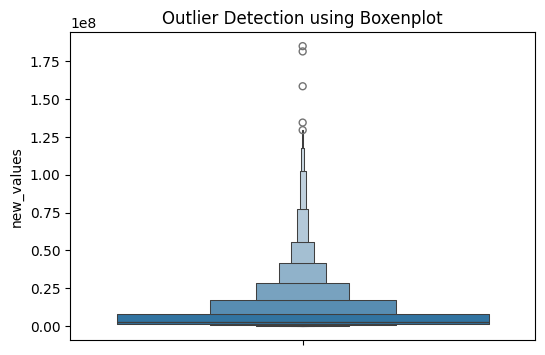

In [28]:
# check for outliers
plt.figure(figsize=(6,4))
sns.boxenplot(y='new_values', data=df)
plt.title('Outlier Detection using Boxenplot')
plt.show()

In [30]:
# remove outliers from the dataset

Q1 = df['new_values'].quantile(0.25)
Q3 = df['new_values'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df['new_values'] >= lower_bound) & (df['new_values'] <= upper_bound)]


print(f"Original size: {df.shape[0]}, New size after outlier removal: {df_filtered.shape[0]}")

Original size: 4216, New size after outlier removal: 3719


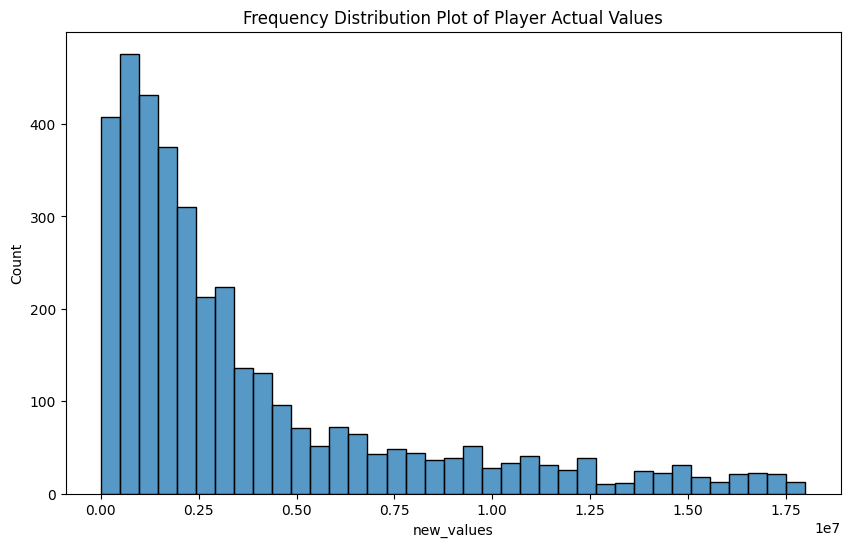

In [31]:
x = df_filtered.new_values
plt.figure(figsize=(10,6))
sns.histplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

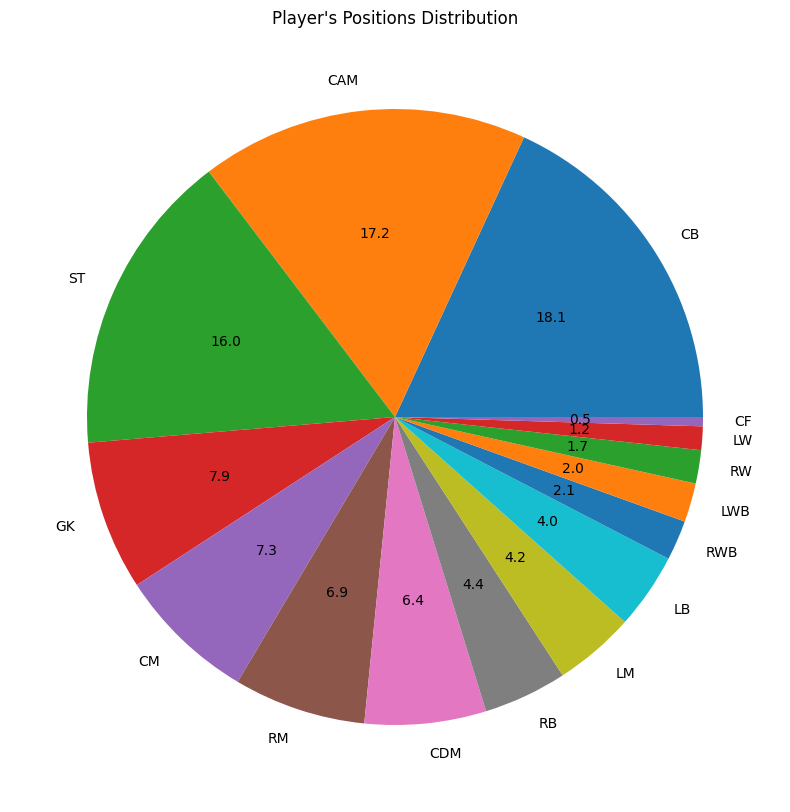

In [37]:
plt.figure(figsize=(10,10))
loc=df_filtered['Best position'].value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 1000x1000 with 0 Axes>

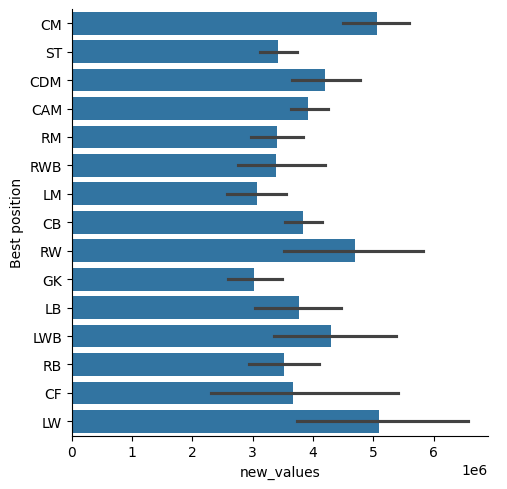

In [38]:
plt.figure(figsize=(10,10))
graph = sns.catplot(y="Best position", x="new_values", kind="bar",  data=df_filtered)
plt.show()

# Modeling

<Axes: xlabel='new_values'>

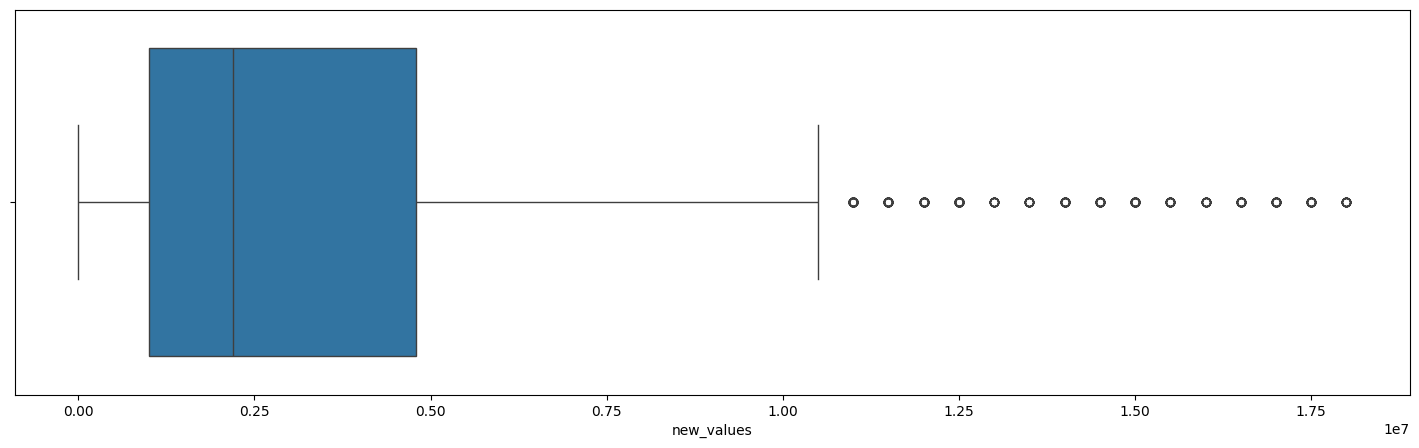

In [41]:


plt.figure(figsize=[18,5])
sns.boxplot(x='new_values', data=df_filtered)



In [42]:
df_filtered.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,...,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,Team,new_wages,new_release_clause
2,A. Wharton CDM CM,19,74+1,85,259240,182,70,Left,76,CM,...,1,67,61,75,76,68,8500000.0,Crystal Palace,16000.0,17900000.0
4,Vitor Roque ST RW LW,18,76,88,276589,172,78,Right,78,ST,...,1,85,79,59,80,20,17500000.0,FC Barcelona,44000.0,39400000.0
5,A. Sieb ST LM,20,69,79,259162,175,75,Right,71,ST,...,1,87,65,55,74,26,3100000.0,SpVgg Greuther Fürth,5000.0,5600000.0
6,J. Mateta ST,26,75,77,236461,192,88,Right,77,ST,...,1,71,73,57,72,34,7000000.0,Crystal Palace,39000.0,13800000.0
11,J. Hato CB LB,17,73,88,272978,182,76,Left,75,CDM,...,1,85,39,66,71,73,6500000.0,Ajax,550.0,13200000.0


In [47]:
df = df_filtered.drop(['ID'], axis=1)

In [50]:
df.drop(["name","foot","Team","Best position"],inplace=True,axis=1)
numeric_columns = df.select_dtypes(include=[object]).columns
numeric_columns
for i in numeric_columns:
    try:
        df[i] = df[i].str.extract('(\d+)').astype(int)
    except Exception:
        pass
numeric_columns = df.select_dtypes(include=[object]).columns
numeric_columns

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Zakroum Hicham\AppData\Local\Temp\ipykernel_1924\340142770.py:6: SyntaxWarning: invalid escape sequence '\d'
  df[i] = df[i].str.extract('(\d+)').astype(int)


Index([], dtype='object')

In [52]:
try:
    df['Overall rating'] = df['Overall rating'].str.extract('(\d+)').astype(int)
    df['Potential'] = df['Potential'].str.extract('(\d+)').astype(int)
    df["Potential"]
except Exception:
        pass

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Zakroum Hicham\AppData\Local\Temp\ipykernel_1924\1711716949.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Overall rating'] = df['Overall rating'].str.extract('(\d+)').astype(int)
C:\Users\Zakroum Hicham\AppData\Local\Temp\ipykernel_1924\1711716949.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Potential'] = df['Potential'].str.extract('(\d+)').astype(int)


In [55]:
df.to_csv('../data/out.csv', index=False)  

In [56]:
df.head()

,Age,Overall rating,Potential,Height,Weight,Best overall,Growth,Total attacking,Crossing,Finishing,...,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,new_wages,new_release_clause
2,19,74,85,182,70,76,11,317,66,59,...,417,1,67,61,75,76,68,8500000.0,16000.0,17900000.0
4,18,76,88,172,78,78,12,335,62,82,...,387,1,85,79,59,80,20,17500000.0,44000.0,39400000.0
5,20,69,79,175,75,71,10,294,47,70,...,371,1,87,65,55,74,26,3100000.0,5000.0,5600000.0
6,26,75,77,192,88,77,2,339,41,75,...,387,1,71,73,57,72,34,7000000.0,39000.0,13800000.0
11,17,73,88,182,76,75,15,270,55,36,...,403,1,85,39,66,71,73,6500000.0,550.0,13200000.0


### just for testing

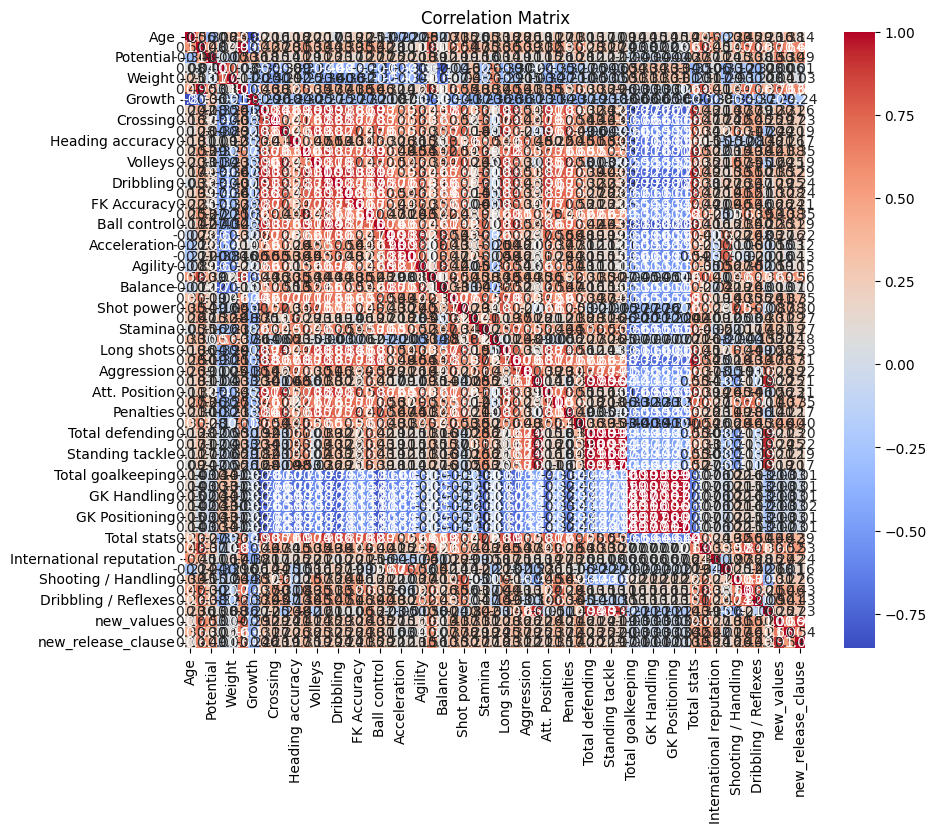

In [53]:
df_ = df

numeric_columns = df_.select_dtypes(include=[np.number]).columns
df_numeric = df_[numeric_columns]
correlation_matrix = df_numeric.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [54]:
correlation_with_target = correlation_matrix['new_values']
correlation_with_target

Age                         0.164229
Overall rating              0.714219
Potential                   0.534414
Height                      0.003745
Weight                      0.035543
Best overall                0.725132
Growth                     -0.291793
Total attacking             0.321867
Crossing                    0.286878
Finishing                   0.235438
Heading accuracy            0.212019
Short passing               0.408536
Volleys                     0.239189
Total skill                 0.347621
Dribbling                   0.292958
Curve                       0.296790
FK Accuracy                 0.261795
Long passing                0.398353
Ball control                0.346066
Total movement              0.272214
Acceleration                0.152858
Sprint speed                0.162133
Agility                     0.191137
Reactions                   0.638719
Balance                     0.132850
Total power                 0.412338
Shot power                  0.373286
J

In [71]:
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Create a list of tuples with variable name and correlation value pairs
sorted_correlation_list = [(variable, correlation) for variable, correlation in sorted_correlation.items()]

# Display the sorted correlation values and names
print("Sorted correlation values and names:")
for variable, correlation in sorted_correlation_list:
    print(f"{variable}: {correlation}")

Sorted correlation values and names:
new_values: 1.0
new_release_clause: 0.9721572702499427
new_wages: 0.8079292204669823
Best overall: 0.6589325830728167
Base stats: 0.5532474227384249
International reputation: 0.5474261178082104
Dribbling / Reflexes: 0.48469274072699825
Passing / Kicking: 0.4702629928291664
Total stats: 0.4215763840806642
Total power: 0.37897673399754817
Total mentality: 0.3335718934136101
Shooting / Handling: 0.3278638758833757
Total skill: 0.3230938705688304
Total attacking: 0.3116792872009468
Total movement: 0.2945167924457115
Pace / Diving: 0.23922933155407497
Defending / Pace: 0.19447843830298048
Total defending: 0.1572716097638106
Age: 0.1087070241830752
Weight: 0.03874115284941076
Height: 0.0257459376205619
Total goalkeeping: -0.010516341562378325
Growth: -0.2346289339484604
Unnamed: 64: nan
